# Assignment: K Mean Cluster (Shopping Index & Income Index)

## Student Name: Hemambujam Veeraraghavan
## Student id: 012482392

In [71]:
import pandas as pd
dfs = pd.read_excel("shopping.xlsx")
dfs

,Shopper,SpendingIndex,IncomeIndex
0,1,3,5
1,2,3,4
2,3,5,6
3,4,2,6
4,5,4,5
5,6,6,8
6,7,6,2
7,8,6,3
8,9,5,6
9,10,6,7


In [72]:
#Simple stats
print("Max and min Income Index:", dfs['IncomeIndex'].max(), dfs['IncomeIndex'].min())
print("Max and min SpendingIndex:", dfs['SpendingIndex'].max(), dfs['SpendingIndex'].min())

Max and min Income Index: 8 1
Max and min SpendingIndex: 9 2


In [73]:
pd.crosstab(dfs['SpendingIndex'],dfs['IncomeIndex'], normalize='index',margins=True)

IncomeIndex,1,2,3,4,5,6,7,8
SpendingIndex,,,,,,,,
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
6,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000
7,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000
9,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
All,0.117647,0.176471,0.117647,0.058824,0.176471,0.235294,0.058824,0.058824


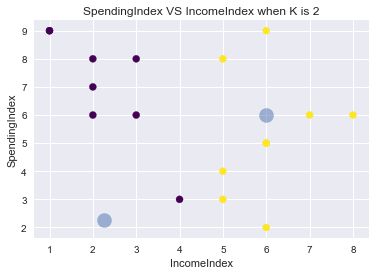

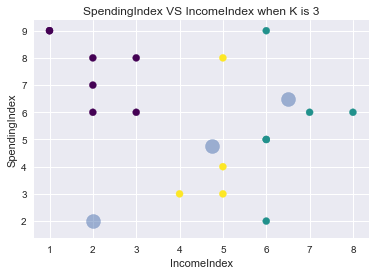

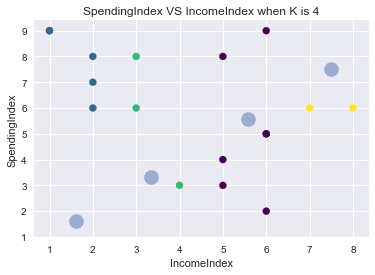

In [74]:
import numpy as np
Y_Output= np.array(dfs['SpendingIndex'])
#X_Input = dfs.drop(['Result'], axis=1)
X_Input = np.array(dfs[['IncomeIndex']])

#KMeansimport numpy as np
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_Input)
y_kmeans = kmeans.predict(X_Input)
plt.scatter(X_Input[:,0], Y_Output, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0],  s=200, alpha=0.5);
plt.xlabel('IncomeIndex')
plt.ylabel('SpendingIndex')
plt.title('SpendingIndex VS IncomeIndex when K is 2')
plt.show()


kmeans = KMeans(n_clusters=3)
kmeans.fit(X_Input)
y_kmeans = kmeans.predict(X_Input)
plt.scatter(X_Input[:,0], Y_Output, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0],  s=200, alpha=0.5);
plt.xlabel('IncomeIndex')
plt.ylabel('SpendingIndex')
plt.title('SpendingIndex VS IncomeIndex when K is 3')
plt.show()




kmeans = KMeans(n_clusters=4)
kmeans.fit(X_Input)
y_kmeans = kmeans.predict(X_Input)
plt.scatter(X_Input[:,0], Y_Output, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0],  s=200, alpha=0.5);
plt.xlabel('IncomeIndex')
plt.ylabel('SpendingIndex')
plt.title('SpendingIndex VS IncomeIndex when K is 4')
plt.show()


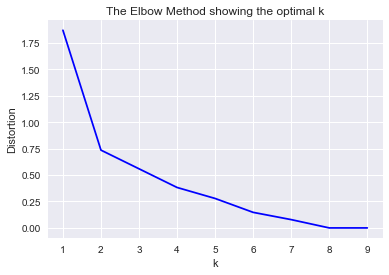

In [75]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_Input)
    kmeanModel.fit(X_Input)
    distortions.append(sum(np.min(cdist(X_Input, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_Input.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()